# Clustering workshop feedback data

In [7]:
# removes timestamp and email field from the data
def get_required_data(dataset):
    return dataset.iloc[:,2:]

### Sentiment classification using Textblob

In [15]:
from textblob import TextBlob

def get_sentiment(text):
    '''
    Utility function to classify sentiment of passed feedback text
    using textblob's sentiment method
    '''
    # create TextBlob object of passed tweet text
    analysis = TextBlob(text)
    # set sentiment
    return analysis.sentiment.polarity

### Importing required libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing data

In [43]:
dataset = pd.read_csv('feedback_data.csv')
X = dataset

### Preprocess data

In [44]:
sentiment_index = [4,7,8,9,10,11] # data index that needs to be passed through sentiment index
categorical_coloum_index = [5,6]

#### missing data

In [45]:
X.iloc[:,sentiment_index] = X.iloc[:,sentiment_index].replace(np.nan, '', regex=True)

#### Converting text data to sentiment score

In [46]:
for i in sentiment_index:
    X.iloc[:, i] = pd.DataFrame({X.columns[i]:list(map(get_sentiment,X.iloc[:, i]))})

#### Encoding categorical data

In [47]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

for i in categorical_coloum_index:
    labelencoder_X = LabelEncoder()
    X.iloc[:, i] = labelencoder_X.fit_transform(X.iloc[:, i])

X_values = X.iloc[:,2:]
onehotencoder = OneHotEncoder(categorical_features = sorted(list(map(lambda x: x-2,categorical_coloum_index))))
X_values = onehotencoder.fit_transform(X_values).toarray()

### Clustering using KNN Algorithm

In [48]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_values)
y_kmeans = kmeans.predict(X_values)

In [49]:
print (len(y_kmeans))
print (len(X_values))

26
26


## Visualizing the cluster

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

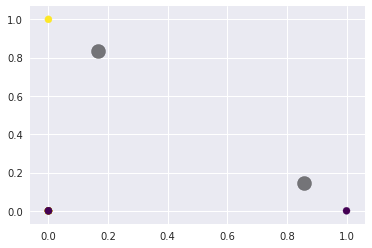

In [51]:
plt.scatter(X_values[:, 2], X_values[:, 3], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
